In [331]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Artist Data

In [98]:
# spotify_df = pd.read_csv('data_w_spotify.csv')
spotify_df.head()

,id,name,isdone,spotifyid,genres,popularity,followers
0,600808,Drake,True,3TVXtAsR1Inumwj472S9r4,"['canadian hip hop', 'canadian pop', 'hip hop'...",98.0,61377383.0
1,706819,Ed Sheeran,True,6eUKZXaKkcviH0Ku9w2n3V,"['pop', 'uk pop']",95.0,93327682.0
2,823336,Ariana Grande,True,66CXWjxzNUsdJxJ2JdwvnR,"['dance pop', 'pop']",93.0,76626333.0
3,1492430,Bad Bunny,True,4q3ewBCX7sLwd24euuV69X,"['latin', 'reggaeton', 'trap latino']",100.0,44516743.0
4,796889,The Weeknd,True,1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ...",98.0,42275433.0


# Number of Weeks on Chart

In [34]:
charts = pd.read_csv('charts.csv')
charts['year'] = pd.to_datetime(charts['date']).apply(lambda x: x.year)
charts

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


In [53]:
song_info = pd.read_csv('dataset.csv').drop_duplicates(subset='track_id').set_index('track_id')

In [54]:
song_info.head()

,Unnamed: 0,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
4qPNDBW1i3p13qLCt0Ki3A,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
1iJBSr7s7jYXzM8EGcbK5b,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
6lfxq3CG4xtTiEg7opyCyx,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
5vjLSffimiIP26QG5WcN2K,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [48]:
merged = pd.merge(charts,song_info,how='inner',left_on='song',right_on='track_name')

# Encoders for feature vector

In [143]:
#OHE for year
OHEyear = OneHotEncoder()
OHEyear.fit(merged['year'].unique().reshape(-1,1))

OneHotEncoder()

In [197]:
#OHE for key
OHEkey = OneHotEncoder()
OHEkey.fit(merged['key'].unique().reshape(-1,1))

OneHotEncoder()

In [199]:
#OHE for time signature
OHEtime_sig = OneHotEncoder()
OHEtime_sig.fit(merged['time_signature'].unique().reshape(-1,1))

OneHotEncoder()

In [200]:
#OHE for track genre
OHEgenre = OneHotEncoder()
OHEgenre.fit(merged['track_genre'].unique().reshape(-1,1))

OneHotEncoder()

In [255]:
OHEgenre.transform(np.array(merged['track_genre']).reshape(-1,1)).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [198]:
merged.columns

Index(['date', 'rank', 'song', 'artist', 'last-week', 'peak-rank',
       'weeks-on-board', 'year', 'Unnamed: 0', 'artists', 'album_name',
       'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [71]:
song_artist_df = merged.groupby(['song','artist']).max()

In [76]:
train, validate, test = np.split(song_artist_df.sample(frac=1, random_state=42), [int(.6*len(song_artist_df)), int(.8*len(song_artist_df))])

# Baseline Mean Model

In [112]:
trainMean = train['weeks-on-board'].mean()
trainMean

13.174507168458781

In [122]:
baseline_MSE_validation = np.mean((validate['weeks-on-board'] - trainMean) ** 2)
baseline_MSE_validation

99.41982068214382

In [123]:
baseline_MSE_test = np.mean((test['weeks-on-board'] - trainMean) ** 2)
baseline_MSE_test

99.75639821571141

# Our Model

In [229]:
def Zscore_features(features):
    mean_dict = dict()
    std_dict = dict()
    for feature in features:
        mu = train[feature].mean()
        sigma = train[feature].std()
        mean_dict[feature] = mu
        std_dict[feature] = sigma
    return (mean_dict,std_dict)

In [413]:
def Zscore(feature,row):
    return (row[feature] - mean_dict[feature]) / std_dict[feature]

In [419]:
#Features we want to use:
#Make a model with OHE values based on threshold vs raw values
#year, duration_ms, danceability, energy, key, loudness, mode, speechiness, acoustincess, intrumentalness, liveness, valence, tempo, time_signature OHE, track_genre OHE

def feature_num_weeks(row):
    #Zscore prep
    mean_dict, std_dict = Zscore_features(['duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','weeks-on-board'])
    feat = [1]
    #training mean
#     feat.append(trainMean)
    #duration_ms
    feat.append(Zscore('duration_ms',row)) 
    #danceability
    feat.append(Zscore('danceability',row))
    #energy
    feat.append(Zscore('energy',row))
    #loudness
    feat.append(Zscore('loudness',row))
    #mode
    feat.append(row['mode'])
    #speechiness
    feat.append(Zscore('speechiness',row))
    #acousticness
    feat.append(Zscore('acousticness',row))
    #instrumentalness
    feat.append(Zscore('instrumentalness',row))
    #liveness
    feat.append(Zscore('liveness',row))
    #valence
    feat.append(Zscore('valence',row))
    #tempo
    feat.append(Zscore('tempo',row))
    #year one hot encoding
    feat += list(OHEyear.transform(np.array(row['year']).reshape(-1,1)).toarray()[0].astype(int))
    #key
    feat += list(OHEkey.transform(np.array(row['key']).reshape(-1,1)).toarray()[0].astype(int))
    #time signature
    feat += list(OHEtime_sig.transform(np.array(row['time_signature']).reshape(-1,1)).toarray()[0].astype(int))
    #track genre
    feat += list(OHEgenre.transform(np.array(row['track_genre']).reshape(-1,1)).toarray()[0].astype(int))
    return feat
    
    

In [421]:
Ytrain = list(train.apply(lambda x: x['weeks-on-board'],axis=1).values)

In [422]:
Xtrain = list(train.apply(feature_num_weeks,axis=1).values)

In [423]:
LR = LinearRegression().fit(Xtrain, Ytrain)

In [430]:
coeff_labels = ['intercept','duration_ms','danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

In [431]:
LR.coef_[:12]

array([ 4.18151319e+08,  8.69913539e-02,  4.50017717e-01,  2.01120749e-01,
       -1.93620079e-02,  4.53335756e-01, -4.26626727e-01,  3.12277570e-02,
       -9.10567127e-01, -1.45232915e-02,  1.18079973e-01, -1.53780270e-01])

In [432]:
list(zip(LR.coef_[:12],coeff_labels))

[(418151318.8606857, 'intercept'),
 (0.08699135387382034, 'duration_ms'),
 (0.4500177169154197, 'danceability'),
 (0.20112074897058338, 'energy'),
 (-0.019362007933029002, 'loudness'),
 (0.4533357563985574, 'mode'),
 (-0.42662672658739975, 'speechiness'),
 (0.031227756986988764, 'acousticness'),
 (-0.9105671267236923, 'instrumentalness'),
 (-0.01452329154392129, 'liveness'),
 (0.11807997267168213, 'valence'),
 (-0.15378026954276725, 'tempo')]

In [427]:
np.mean((LR.predict(Xtrain) - Ytrain) ** 2)

89.42835206647928

In [428]:
#Validation
Xvalid = list(validate.apply(feature_num_weeks,axis=1).values)
Yvalid = list(validate.apply(lambda x: x['weeks-on-board'],axis=1).values)

In [429]:
np.mean((LR.predict(Xvalid) - Yvalid) ** 2)

90.85180426925741

# Data Exploration

In [91]:
#Only 8% of songs are explicit, that will add irrelevant weights to that feature so we're not including it
merged['explicit'].mean()

0.08089024989745469

In [92]:
merged['mode'].mean()

0.6269824123041854

<AxesSubplot:xlabel='year'>

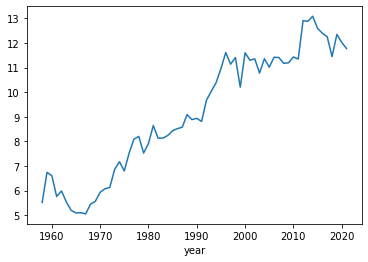

In [39]:
#Definitely want to OHE year
charts.groupby('year').mean()['weeks-on-board'].plot()

In [17]:
charts

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1
